# Homework 2 (KNN)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart health:

- age           : The person's age in years
- sex           : The person's sex (1 = male, 0 = female)
- cp            : The chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trtbps        : The person's resting blood pressure (mm Hg on admission to the hospital)
- chol          : The person's cholesterol measurement in mg/dl
- fbs           : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg       : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- hr            : The person's maximum heart rate achieved
- exng          : Exercise induced angina (1 = yes; 0 = no)
- oldpeak       : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope         : the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- vessels       : The number of major vessels (0 - 4)
- thal          : A blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversable defect, 3 = unreversable defect)
- heart_disease : Heart disease (0 = no, 1 = yes)


Many of the features come from Electrocardiogram Tests (ECG/EKG), where the electrical rhythms of the heart are measured. Here's an example of an ECG reading:


![ECG Example](ecg.jpg)



### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict whether an incoming patient is likely to have heart disease or not

In this assignment, we will be using K-nearest-neighbors as the classifier

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW2.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [2]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [3]:
heart_health_df = pd.read_csv("data_hw2.csv")
heart_health_df.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

#### Answer 1:
There are 303 patients as indicated by calling heart_health_df.info() below.

In [4]:
heart_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   bp             303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   hr             303 non-null    int64  
 8   exng           303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  vessels        303 non-null    int64  
 12  thall          303 non-null    int64  
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


First, we want to get our data ready for analysis.

__Q2:__ The categorical variables in the data set are already encoded, but which features would be considered categorical? (I counted 9, including the dependent variable)

#### Answer 2:
The 9 categorical features are: sex, cp, fbs, restecg, exng, slope, vessels, thall, and heart_disease.

__Q3:__ How might categorical variables affect a KNN classifier?

#### Answer 3:
Categorical variables must be converted to numeric representations for KNN to work properly. Once the categorical features are converted, they may introduce challenges related to distance metrics, scaling, and data sparsity. Thus, it is important to transform categorical variables correctly.

Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Once again, look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function to make it readable. Remember, we want the colors to immediately pop out and tell us what's happening without having to read the numbers. It's much easier to see color differences than read a table of numbers. The job of a data scientist is to make data understandable.

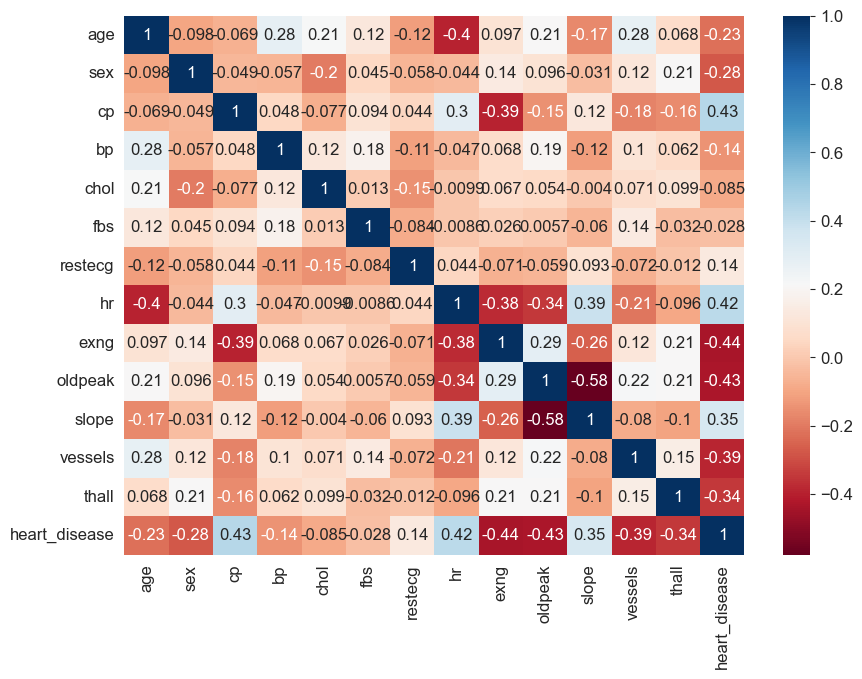

In [5]:
sns.heatmap(heart_health_df.corr(), annot = True, cmap = "RdBu")
plt.show()

__Q4:__ What sticks out from the heatmap, and what does it tell us about our data, especially heart disease?

#### Answer 4:
Most of the features appear to have a low correlation with heart disease. More specifically, chest pain experienced (cp), maximum heart rate (hr), and slope of peak excercise (slope) have low positive correlations with heart disease. This means that they have some influence in predicting whether an incoming patient will have heart disease or not. However, some of the features, such as excersize induced angina (exng), ST depression induced by excerise relative to rest (oldpeak), number of major vessels (vessels), and thalassemia (thall) all have a low negative correlation with heart disease. Thus, these features are slightly inversely related to predicting whether an incoming patient will have heart disease or not. 

__Q5:__ Do you think this correlation matrix is affected at all by the fact that heart_disease is a categorical variable?

More on [understanding correlation](https://www.mathsisfun.com/data/correlation.html)

#### Answer 5:

Yes, the fact that heart_disease is a categorical variable can affect the interpretation of the correlation matrix. Since heart_disease is a binary categorical variable with only two possible values (0 or 1), it cannot be treated as a continuous variable. Correlation is a measure of the linear relationship between two continuous variables. Therefore, calculating the correlation coefficient between a continuous variable and a binary variable may not be meaningful.

We have mostly categorical variables in this data set, and on top of that, we are not medical experts, so the exact definition of some features may not be obvious to us. How can we better understand the data like this?

With something like this, I like using [Seaborn violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html), because they are very intuitive.

In my correlation plot, there were 4 variables that had > +/- 0.40 correlation with heart_disease:
- cp
- hr
- exng
- oldpeak

So, let's look at those. Try using a violin plot to create the following images. The features are labeled on the x and y axis. As a tip, make sure the following are included in your function call,

```hue = 'heart_disease'```

```split = True```

Check out the above link to see the documentation for violin plots if you have any questions, or use Google :)

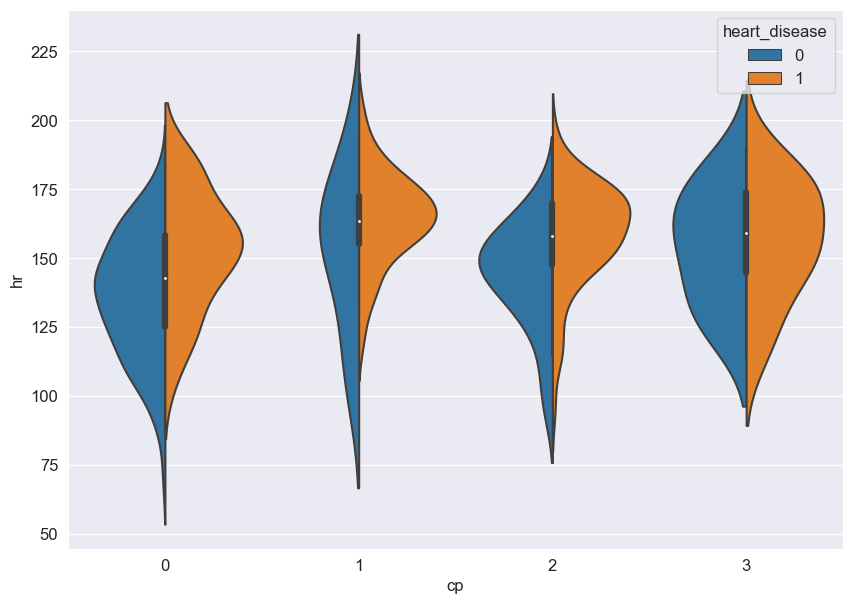

In [8]:
v_plot = sns.violinplot(x = 'cp', y = 'hr', hue = 'heart_disease', split = True, data = heart_health_df)
plt.show()

__Q6:__ What can we learn from the above plot about the relations between the 3 features?

#### Answer 6:
For patients with typical angina (cp = 0), the maximum heart rate achieved by most patients without heart disease was around 140, and around 155 for most patients with heart disease. The median maximum heart rate was around 145 for patients with typical angina. For patients with atypical angina (cp = 1), the maximum heart rate achieved by most patients without heart disease was around 160, and around 170 for most patients with heart disease. The median maximum heart rate was around 163 for patients with atypical angina. For patients with non-anginal pain (cp = 2), the maximum heart rate achieved by most patients without heart disease was around 150, and around 170 for most patients with heart disease. The median maximum heart rate for this group was between 150 and 170, at around 160. Most asymptomatic patients had a maximum heart rate of around 165 which was slightly higher than the median maximum heart rate.

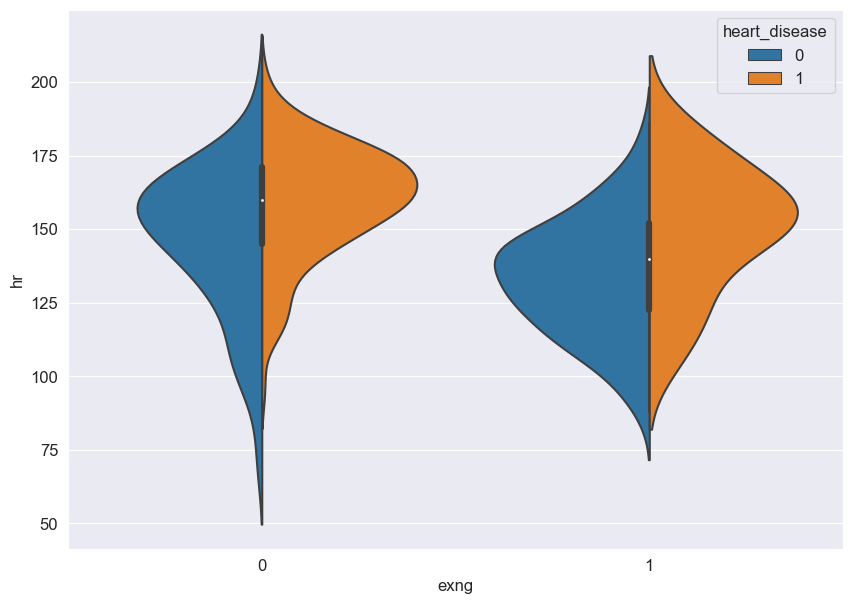

In [9]:
v_plot = sns.violinplot(x = 'exng', y = 'hr', hue = 'heart_disease', split = True, data = heart_health_df)
plt.show()

__Q7:__ What can we learn from the above plot about the relations between the 3 features?

#### Answer 7:
For patients without exercise induced angina and no heart disease, the maximum heart rate for most patients was around 155. The maximum heart rate for most patients in the same group with heart disease was around 165. For patients with exercise induced angina and no heart disease, the maximum heart rate for most patients was around 138. However, the maximum heart rate for most patients in the same group with heart disease was around 155. 

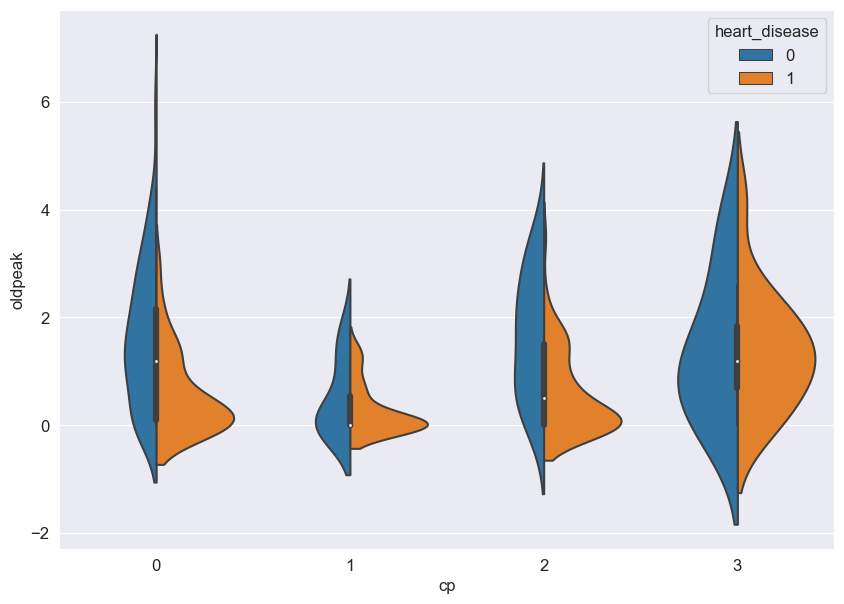

In [10]:
v_plot = sns.violinplot(x = 'cp', y = 'oldpeak', hue = 'heart_disease', split = True, data = heart_health_df)
plt.show()

__Q8:__ What can we learn from the above plot about the relations between the 3 features?

#### Answer 8:

For patients with typical angina and no heart disease, more outliers were present for oldpeak than from the other plots. Regardless of the type of chest pain experienced, all four plots except for asymptomatic patients (cp = 3) indicate that most patients with heart disease have a smaller concentrated range for oldpeak. However, most patients without heart disease have a more generalized range for oldpeak with a more uniform distribution.

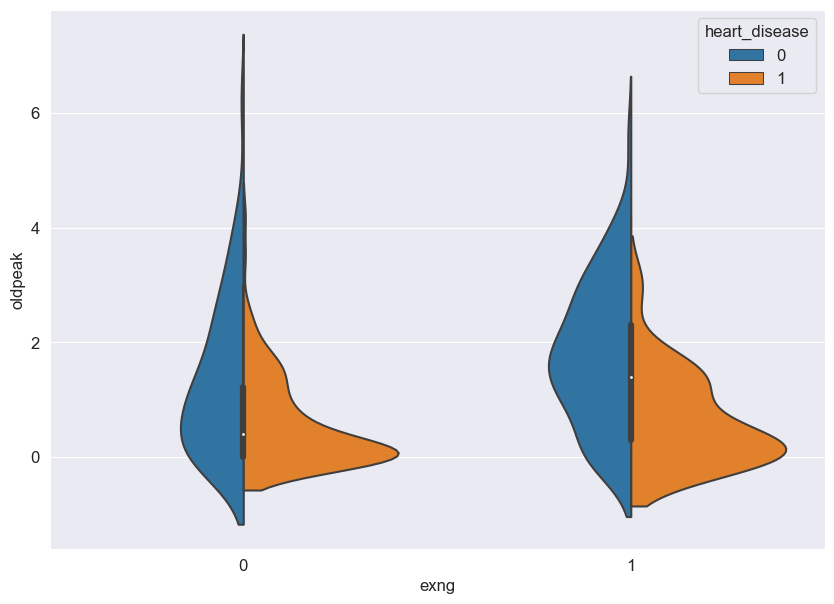

In [11]:
v_plot = sns.violinplot(x = 'exng', y = 'oldpeak', hue = 'heart_disease', split = True, data = heart_health_df)
plt.show()

__Q9:__ What can we learn from the above plot about the relations between the 3 features?

#### Answer 9:

For patients without heart disease, more outliers were present for oldpeak. The median and interquartile range for patients with exercise induced angina was slightly higher than the median and interquartile range for patients without exercise induced angina. For most patients with heart disease, oldpeak was around 0 for both exng values (either 0 or 1).

As we can see, using violin plots is a unique and cool way to visualize and help us to comprehend how different features are interacting with one another in our data set. There are many other ways to do it, but being able to understand the data set you have is a really important part of any data science project. Visual representations are also super helpful for our brains to help us intuitively understand the data.

### Part 2: KNN Analysis

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, HW1, the lecture notes, or the just google the specific function to see how to use it.

First, let's split and then scale the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [27]:
# Separate the features and target variable
X = heart_health_df.drop('heart_disease', axis=1)
y = heart_health_df['heart_disease']

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Convert the scaled features back to pandas dataframe
train_x = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x = pd.DataFrame(test_x_scaled, columns=test_x.columns)

train_x.head()

,age,sex,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,slope,vessels,thall
0,0.333333,1.0,1.000000,0.150943,0.277108,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
1,0.500000,1.0,0.000000,0.433962,0.130120,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.270833,1.0,0.666667,0.339623,0.074699,0.0,0.5,0.603053,0.0,0.000000,1.0,0.00,0.666667
3,1.000000,1.0,0.000000,0.292453,0.373494,0.0,0.0,0.694656,1.0,0.000000,1.0,0.75,0.666667
4,0.416667,0.0,0.000000,0.339623,0.289157,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667


__Q10:__ What test_size did you decide to use?

#### Answer 10:

I decided to use a test_size of 0.2, meaning that 20% of the data will be used for testing and 80% of the data will be used for training.

Now, we want to actually run the KNN analysis. Using KNeighborsClassifier and a for loop, run KNN using different values of k, from 2 -> 25. Print them out as they are run.

Make sure to save the accuracies in a list or array, as they will be used later.

In [28]:
# Initialize lists to store accuracies
accuracies = []

# Loop through k values and fit the KNN model
for k in range(2, 25):
    knn = KNeighborsClassifier(k)
    knn.fit(train_x, train_y)
    accuracy = knn.score(test_x, test_y)
    accuracies.append(accuracy)
    print(f"k = {k}    Accuracy = {accuracy}")

k = 2    Accuracy = 0.8032786885245902
k = 3    Accuracy = 0.8360655737704918
k = 4    Accuracy = 0.8524590163934426
k = 5    Accuracy = 0.8688524590163934
k = 6    Accuracy = 0.8524590163934426
k = 7    Accuracy = 0.8688524590163934
k = 8    Accuracy = 0.8852459016393442
k = 9    Accuracy = 0.8852459016393442
k = 10    Accuracy = 0.8688524590163934
k = 11    Accuracy = 0.8524590163934426
k = 12    Accuracy = 0.8524590163934426
k = 13    Accuracy = 0.819672131147541
k = 14    Accuracy = 0.8360655737704918
k = 15    Accuracy = 0.819672131147541
k = 16    Accuracy = 0.819672131147541
k = 17    Accuracy = 0.819672131147541
k = 18    Accuracy = 0.8360655737704918
k = 19    Accuracy = 0.819672131147541
k = 20    Accuracy = 0.819672131147541
k = 21    Accuracy = 0.819672131147541
k = 22    Accuracy = 0.8360655737704918
k = 23    Accuracy = 0.819672131147541
k = 24    Accuracy = 0.8524590163934426


Now, do the same thing as above, but try using a different distance function (try 'cosine') as part of the KNearestNeighbors function.

In [29]:
# Initialize lists to store accuracies
accuracies_cosine = []

# Loop through k values and fit the KNN model
for k in range(2, 25):
    knn = KNeighborsClassifier(k, metric = 'cosine')
    knn.fit(train_x, train_y)
    accuracy = knn.score(test_x, test_y)
    accuracies_cosine.append(accuracy)
    print(f"k = {k}    Accuracy = {accuracy}")

k = 2    Accuracy = 0.819672131147541
k = 3    Accuracy = 0.8360655737704918
k = 4    Accuracy = 0.8688524590163934
k = 5    Accuracy = 0.8852459016393442
k = 6    Accuracy = 0.8524590163934426
k = 7    Accuracy = 0.8852459016393442
k = 8    Accuracy = 0.8852459016393442
k = 9    Accuracy = 0.8688524590163934
k = 10    Accuracy = 0.8688524590163934
k = 11    Accuracy = 0.8360655737704918
k = 12    Accuracy = 0.8524590163934426
k = 13    Accuracy = 0.8360655737704918
k = 14    Accuracy = 0.8688524590163934
k = 15    Accuracy = 0.8360655737704918
k = 16    Accuracy = 0.8360655737704918
k = 17    Accuracy = 0.819672131147541
k = 18    Accuracy = 0.8360655737704918
k = 19    Accuracy = 0.819672131147541
k = 20    Accuracy = 0.8524590163934426
k = 21    Accuracy = 0.8360655737704918
k = 22    Accuracy = 0.8688524590163934
k = 23    Accuracy = 0.8360655737704918
k = 24    Accuracy = 0.8360655737704918


Finally, choose your own distance function from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics). Make sure to save these accuracies as well

In [32]:
# Initialize lists to store accuracies
accuracies_manhattan = []

# Loop through k values and fit the KNN model
for k in range(2, 25):
    knn = KNeighborsClassifier(k, metric = 'manhattan')
    knn.fit(train_x, train_y)
    accuracy = knn.score(test_x, test_y)
    accuracies_manhattan.append(accuracy)
    print(f"k = {k}    Accuracy = {accuracy}")

k = 2    Accuracy = 0.8032786885245902
k = 3    Accuracy = 0.8032786885245902
k = 4    Accuracy = 0.8360655737704918
k = 5    Accuracy = 0.8524590163934426
k = 6    Accuracy = 0.8524590163934426
k = 7    Accuracy = 0.8852459016393442
k = 8    Accuracy = 0.8688524590163934
k = 9    Accuracy = 0.8688524590163934
k = 10    Accuracy = 0.8360655737704918
k = 11    Accuracy = 0.8360655737704918
k = 12    Accuracy = 0.8360655737704918
k = 13    Accuracy = 0.8524590163934426
k = 14    Accuracy = 0.8524590163934426
k = 15    Accuracy = 0.8524590163934426
k = 16    Accuracy = 0.8524590163934426
k = 17    Accuracy = 0.8688524590163934
k = 18    Accuracy = 0.8688524590163934
k = 19    Accuracy = 0.8688524590163934
k = 20    Accuracy = 0.8524590163934426
k = 21    Accuracy = 0.8688524590163934
k = 22    Accuracy = 0.8688524590163934
k = 23    Accuracy = 0.8688524590163934
k = 24    Accuracy = 0.8688524590163934


Now, plot the three different accuracies using SeaBorn lineplots on a single graph/ax. The first line has been added to help you begin. Not all the details have to be shown as the one below, but the graph should still make sense and be readable. You also might use a different distance metric for the 2nd and 3rd models, so it's okay if that's different.

If you want to learn more about how Seaborn/Matplotlib graphs work, check out the documentation.

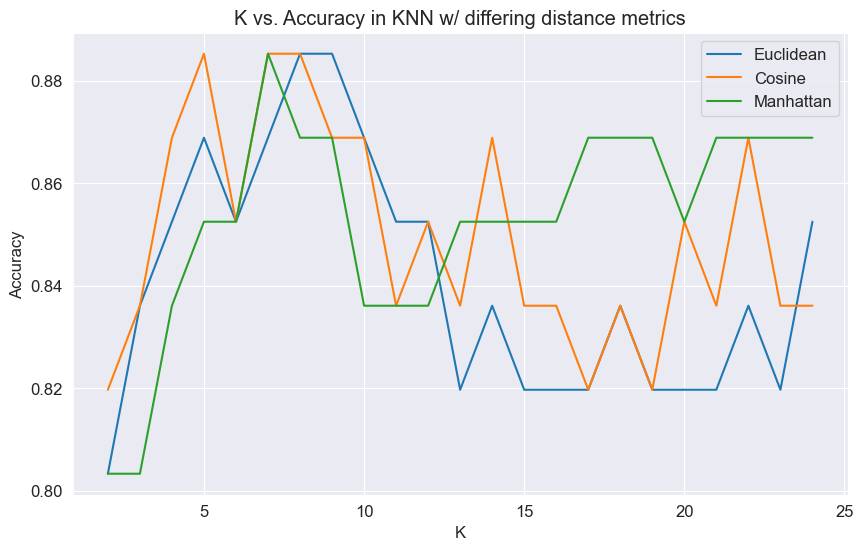

In [39]:
# Plot the accuracy results for the three models
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.title("K vs. Accuracy in KNN w/ differing distance metrics")
plt.xlabel("K")
plt.ylabel("Accuracy")

K = np.arange(2, 25)

# Plot KNN model with Euclidean distance metric
sns.lineplot(x = K, y = accuracies, label= "Euclidean")

# Plot KNN model with Cosine distance metric
sns.lineplot(x = K, y = accuracies_cosine, label = "Cosine")

# Plot KNN model with Manhattan distance metric
sns.lineplot(x = K, y = accuracies_manhattan, label = "Manhattan")

# Add legend
plt.legend()
plt.show()

__Q11:__ Which distance function worked best for you? What do you think the benefit of using different distance functions might be? 

#### Answer 11:

The distance function that worked best for me was Manhattan. The choice of distance function can significantly impact the performance of a KNN classifier, as it affects how the algorithm measures the similarity between data points. By using different distance functions, we can explore the impact of this choice on the accuracy of the model and potentially find a better choice for the specific problem we are trying to solve.

Do any another analysis you see fit or are curious about. Extra work is often rewarded with bonus points!

In [42]:
# Initialize lists to store accuracies
accuracies_nan_euclidean = []

# Loop through k values and fit the KNN model
for k in range(2, 25):
    knn = KNeighborsClassifier(k, metric = 'nan_euclidean')
    knn.fit(train_x, train_y)
    accuracy = knn.score(test_x, test_y)
    accuracies_nan_euclidean.append(accuracy)
    print(f"k = {k}    Accuracy = {accuracy}")

k = 2    Accuracy = 0.8032786885245902
k = 3    Accuracy = 0.8360655737704918
k = 4    Accuracy = 0.8524590163934426
k = 5    Accuracy = 0.8688524590163934
k = 6    Accuracy = 0.8524590163934426
k = 7    Accuracy = 0.8688524590163934
k = 8    Accuracy = 0.8852459016393442
k = 9    Accuracy = 0.8852459016393442
k = 10    Accuracy = 0.8688524590163934
k = 11    Accuracy = 0.8524590163934426
k = 12    Accuracy = 0.8524590163934426
k = 13    Accuracy = 0.819672131147541
k = 14    Accuracy = 0.8360655737704918
k = 15    Accuracy = 0.819672131147541
k = 16    Accuracy = 0.819672131147541
k = 17    Accuracy = 0.819672131147541
k = 18    Accuracy = 0.8360655737704918
k = 19    Accuracy = 0.819672131147541
k = 20    Accuracy = 0.819672131147541
k = 21    Accuracy = 0.819672131147541
k = 22    Accuracy = 0.8360655737704918
k = 23    Accuracy = 0.819672131147541
k = 24    Accuracy = 0.8524590163934426


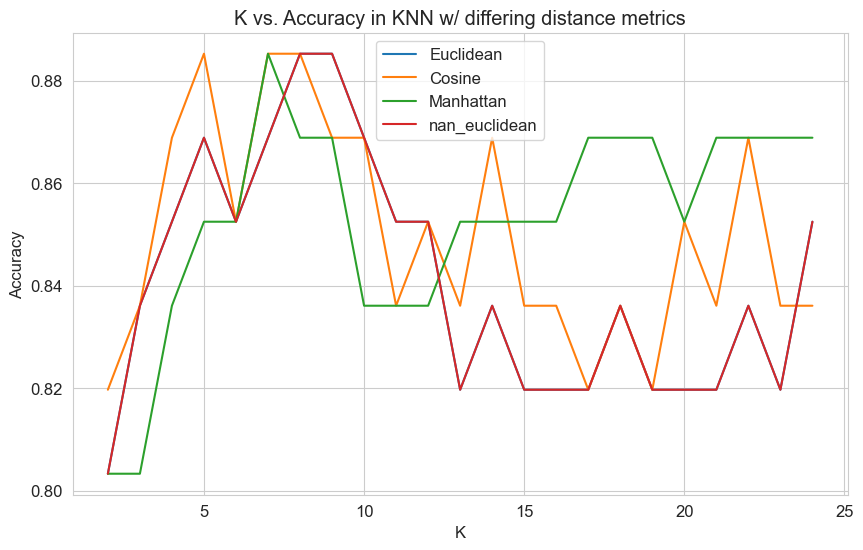

In [43]:
# Plot the accuracy results for the four models
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("K vs. Accuracy in KNN w/ differing distance metrics")
plt.xlabel("K")
plt.ylabel("Accuracy")

K = np.arange(2, 25)

# Plot KNN model with Euclidean distance metric
sns.lineplot(x = K, y = accuracies, label= "Euclidean")

# Plot KNN model with Cosine distance metric
sns.lineplot(x = K, y = accuracies_cosine, label = "Cosine")

# Plot KNN model with Manhattan distance metric
sns.lineplot(x = K, y = accuracies_manhattan, label = "Manhattan")

# Plot KNN model with nan_euclidean distance metric
sns.lineplot(x = K, y = accuracies_nan_euclidean, label = "nan_euclidean")

# Add legend
plt.legend()
plt.show()

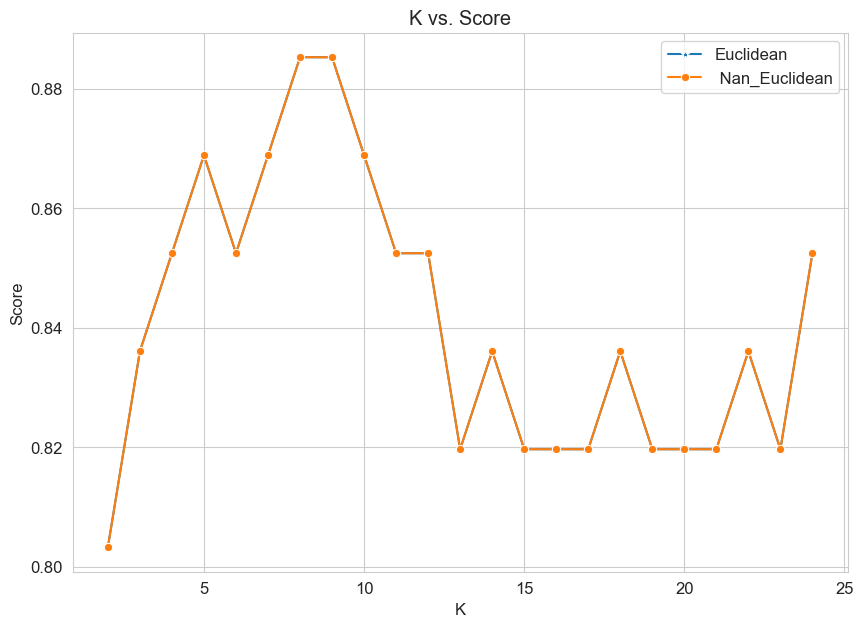

In [44]:
sns.lineplot(x = K, y = accuracies, marker = '*', label = 'Euclidean')
sns.lineplot(x = K, y = accuracies_nan_euclidean, marker = 'o', label = ' Nan_Euclidean')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Nan_Euclidean and Euclidean distances appear to have the same graph.

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

#### Report:

In this assignment, the goal was to predict whether incoming patients are likely to have heart disease or not using K-nearest-neighbors as the classifier. We decided to use a heatmap to determine the correlations between different features. The heatmap generated showed that chest pain experienced, maximum heart rate, and slope of peak exercise have low positive correlations with heart disease. In contrast, exercise-induced angina, ST depression induced by exercise relative to rest, the number of major vessels, and thalassemia all have low negative correlations with heart disease. The analysis revealed that while some features slightly predict whether incoming patients have heart disease, others were inversely related to it.

The violin plots showed us that the maximum heart rate achieved by most patients with heart disease was higher than those without heart disease for patients with typical angina, atypical angina, and non-anginal pain, respectively. Thus, we can conclude that patients with a higher maximum heart rate are more likely to have heart disease. Finally, we created multiple KNN models with different distance parameters to determine which model was the most accurate. The model that relied on Manhattan distance performed better than the models that relied on Cosine and Euclidean distance, indicating that the KNN model that used the Manhattan distance metric may provide more accurate predictions on whether an incoming patient has heart disease. 